In [1]:
import cv2
import numpy as np

import pylab as plt
%matplotlib inline

In [2]:
def mean_std(image, win):
    height = image.shape[0]
    width = image.shape[1]
    
    mean = np.ones(image.shape)
    std = np.ones(image.shape)

    for h in range(0, height, win):
        for w in range(0, width, win):
            mean[h:h+win, w:w+win]*=np.mean(image[h:h+win, w:w+win])
            std[h:h+win, w:w+win]*=np.std(image[h:h+win, w:w+win])
    return mean, std

def threshold_sauvola(image, window_size, k, r=None):
    result = np.zeros(image.shape)

    if r is None: 
        r = 0.5*(image.max()-image.min()) 

    m, s = mean_std(image, window_size)
    T = m * (1 + k * ((s / r) - 1))

    bright = T >= image
    dark = T < image
    result[bright] = 1
    result[dark] = 0

    return result

In [3]:
img = cv2.imread("../db_images/png/captcha.png", 0)

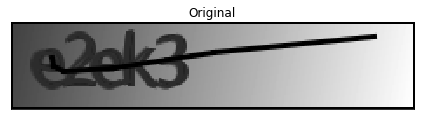

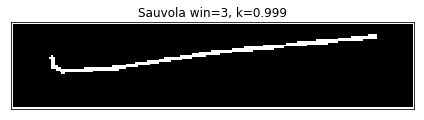

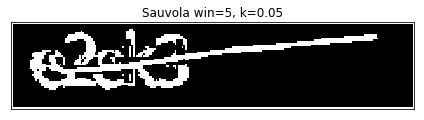

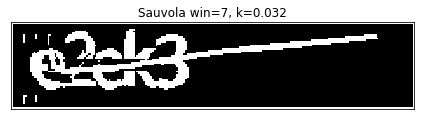

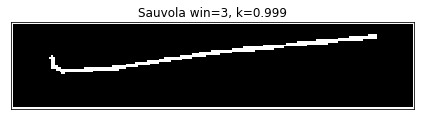

In [4]:
image1 = threshold_sauvola(img, window_size=3, k=0.999, r=128)
image2 = threshold_sauvola(img, window_size=5, k=0.05)
image3 = threshold_sauvola(img, window_size=7, k=0.032)
image4 = threshold_sauvola(img, window_size=3, k=0.999)

thresholds = [
    ('Original', img),
    ('Sauvola win=3, k=0.999', image1),
    ('Sauvola win=5, k=0.05', image2),
    ('Sauvola win=7, k=0.032', image3),
    ('Sauvola win=3, k=0.999', image4)
]

for title, image in thresholds:
    plt.figure()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.imshow(image, cmap='gray')
    plt.tight_layout()

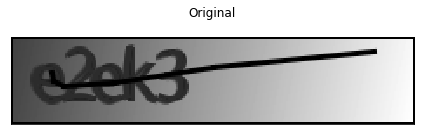

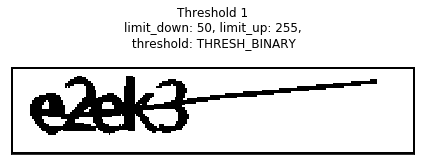

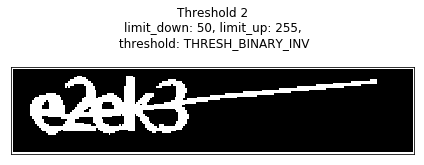

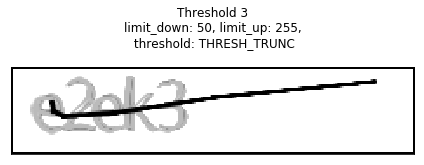

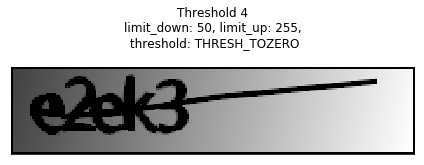

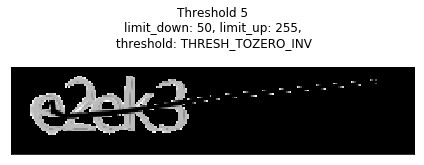

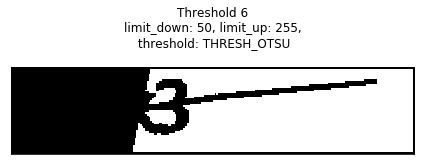

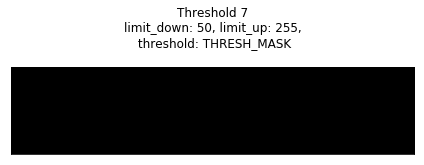

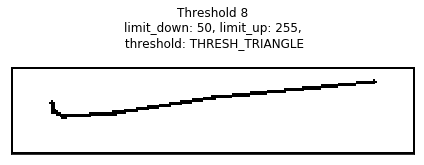

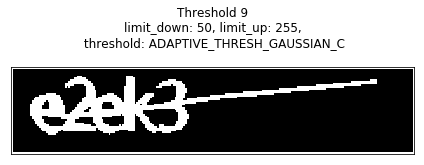

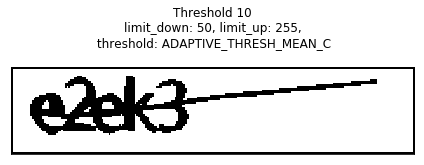

In [111]:
ret, thresh1 = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 60, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 60, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 60, 255, cv2.THRESH_TOZERO_INV)
ret, thresh6 = cv2.threshold(img, 60, 255, cv2.THRESH_OTSU)
ret, thresh7 = cv2.threshold(img, 60, 255, cv2.THRESH_MASK)
ret, thresh8 = cv2.threshold(img, 60, 255, cv2.THRESH_TRIANGLE)
ret, thresh9 = cv2.threshold(img, 60, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
ret, thresh10 = cv2.threshold(img, 60, 255, cv2.ADAPTIVE_THRESH_MEAN_C)

thresholds = [
    ('Original\n', img),
    ('Threshold 1\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_BINARY\n', thresh1),
    ('Threshold 2\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_BINARY_INV\n', thresh2),
    ('Threshold 3\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_TRUNC\n', thresh3),
    ('Threshold 4\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_TOZERO\n', thresh4),
    ('Threshold 5\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_TOZERO_INV\n', thresh5),
    ('Threshold 6\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_OTSU\n', thresh6),
    ('Threshold 7\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_MASK\n', thresh7),
    ('Threshold 8\nlimit_down: 50, limit_up: 255,\n threshold: THRESH_TRIANGLE\n', thresh8),
    ('Threshold 9\nlimit_down: 50, limit_up: 255,\n threshold: ADAPTIVE_THRESH_GAUSSIAN_C\n', thresh9),
    ('Threshold 10\nlimit_down: 50, limit_up: 255,\n threshold: ADAPTIVE_THRESH_MEAN_C\n', thresh10),
 
]

for title, image in thresholds:
    plt.figure()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.imshow(image, cmap='gray')
    plt.tight_layout()